## FutureFame


### 1) Problem statement
- To develop and design a system to enhance student success by using machine learning to analyze factors influencing academic performance, enabling educators to provide timely interventions and support.


### 2) Data Collection
- The dataset containing 2000 lines are used and the User can also provide the Dataset of his/her choice.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('C:\\Users\\chandan\\Desktop\\22copy\\uploads\\new.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score,final_score
0,male,public,dance,70,completed,55,57,57
1,male,private,drama,75,completed,89,90,91
2,male,public,dance,70,none,50,45,49
3,male,private,dance,70,completed,60,63,63
4,female,public,drama,65,completed,66,71,70


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- University_type : type of university where the student is studying(Private /Public)
- Extra _curricular: extra curricular activities that a student participates in.
                   -> (Sports ,Art,Music etc.)
- Attendance  : attendance record of the student .
- test preparation course : complete or not complete before test
- test score
- preparatory score
- final score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                     0
university_type            0
extra_curricular           0
attendance                 0
test_preparation_course    0
test_score                 0
prep_score                 0
final_score                0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

9

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   university_type          1000 non-null   object
 2   extra_curricular         1000 non-null   object
 3   attendance               1000 non-null   int64 
 4   test_preparation_course  1000 non-null   object
 5   test_score               1000 non-null   int64 
 6   prep_score               1000 non-null   int64 
 7   final_score              1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                      2
university_type             2
extra_curricular            6
attendance                  5
test_preparation_course     2
test_score                 97
prep_score                 96
final_score                93
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,attendance,test_score,prep_score,final_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,74.795000,65.115000,68.981000,68.298000
std,10.963721,26.744177,28.471974,27.110666
min,60.000000,0.000000,0.000000,2.000000
25%,70.000000,55.000000,58.000000,58.000000
50%,70.000000,70.000000,77.000000,74.000000
75%,75.000000,86.000000,92.000000,90.000000
max,95.000000,100.000000,100.000000,101.000000


### 3.6 Exploring Data

In [10]:
df.head()

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score,final_score
0,male,public,dance,70,completed,55,57,57
1,male,private,drama,75,completed,89,90,91
2,male,public,dance,70,none,50,45,49
3,male,private,dance,70,completed,60,63,63
4,female,public,drama,65,completed,66,71,70


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'university_type' variable:  ",end=" ")
print(df['university_type'].unique())

print("Categories in'extra_curricular' variable:",end=" " )
print(df['extra_curricular'].unique())

print("Categories in 'attendance' variable:     ",end=" " )
print(df['attendance'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'university_type' variable:   ['public' 'private']
Categories in'extra_curricular' variable: ['dance' 'drama' 'music' 'volunteering activity' 'art' 'sports']
Categories in 'attendance' variable:      [70 75 65 95 60]
Categories in 'test_preparation_course' variable:      ['completed' 'none']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['attendance', 'test_score', 'prep_score', 'final_score']

We have 4 categorical features : ['gender', 'university_type', 'extra_curricular', 'test_preparation_course']


In [13]:
df.head(2)

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score,final_score
0,male,public,dance,70,completed,55,57,57
1,male,private,drama,75,completed,89,90,91


### 3.7 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['final_score'] + df['test_score'] + df['prep_score']
df['average'] = df['total score']/3
df.head()

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score,final_score,total score,average
0,male,public,dance,70,completed,55,57,57,169,56.333333
1,male,private,drama,75,completed,89,90,91,270,90.000000
2,male,public,dance,70,none,50,45,49,144,48.000000
3,male,private,dance,70,completed,60,63,63,186,62.000000
4,female,public,drama,65,completed,66,71,70,207,69.000000


In [15]:
test_full = df[df['test_score'] == 100]['average'].count()
prep_full = df[df['prep_score'] == 100]['average'].count()
final_full = df[df['final_score'] == 100]['average'].count()

print(f'Number of students with full marks in Final: {final_full}')
print(f'Number of students with full marks in Preparatory: {prep_full}')
print(f'Number of students with full marks in Test: {test_full}')

Number of students with full marks in Final: 24
Number of students with full marks in Preparatory: 109
Number of students with full marks in Test: 15


In [16]:
test_less_20 = df[df['test_score'] <= 20]['average'].count()
prep_less_20 = df[df['prep_score'] <= 20]['average'].count()
final_less_20 = df[df['final_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Final: {final_less_20}')
print(f'Number of students with less than 20 marks in Preparatory: {prep_less_20}')
print(f'Number of students with less than 20 marks in Test: {test_less_20}')

Number of students with less than 20 marks in Final: 83
Number of students with less than 20 marks in Preparatory: 106
Number of students with less than 20 marks in Test: 105


#####  Insights
 - From above values we get students have performed the worst in their Test
 - The Best performance is seen in the Preparatory exam where 231 students scored full marks

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- pie
- Bar plot

#### 4.1.1 Histogram

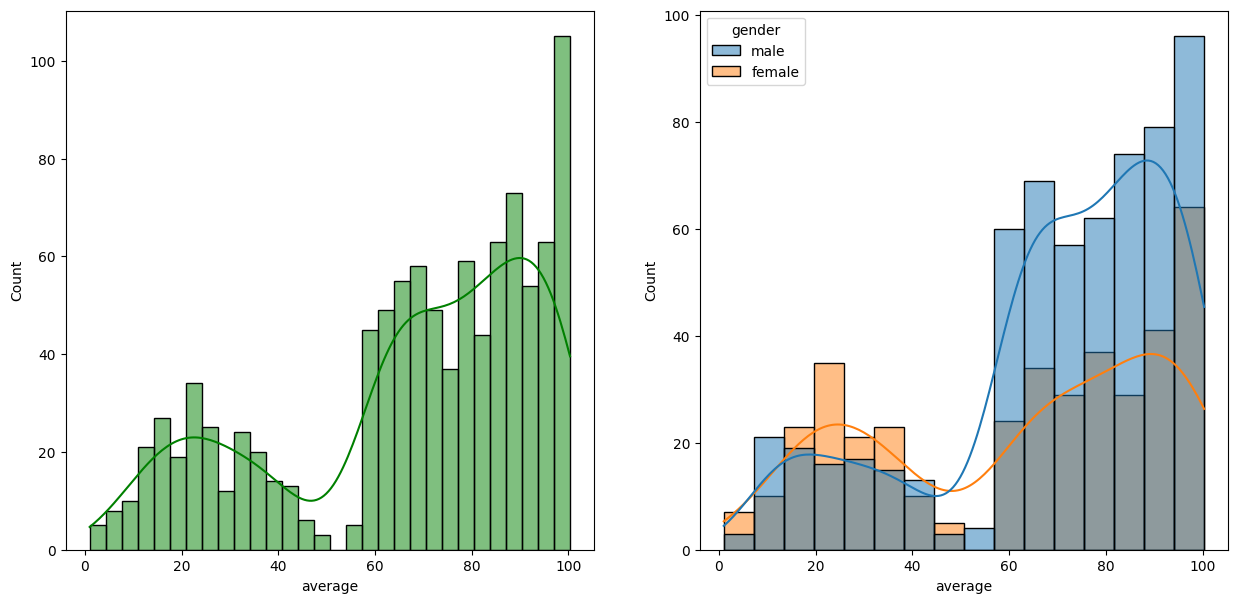

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#####  Insights
- From above values, Male students tend to perform well then Female students.

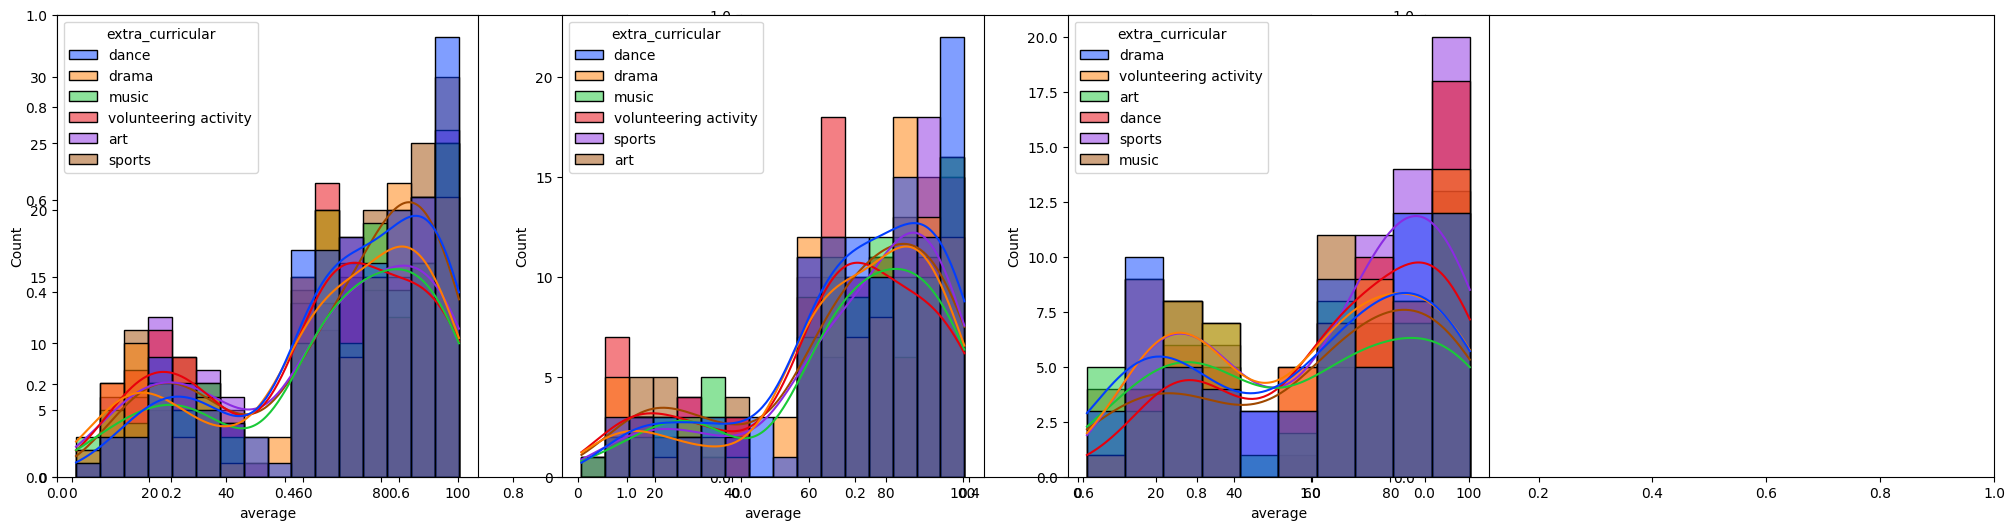

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='extra_curricular',palette='bright')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='extra_curricular',palette='bright')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='extra_curricular',palette='bright')
plt.show()

#####  Insights
- In general students who have chosen dance have perform well in their exam.
- 2nd plot shows that male student who have opted for volunteering activity have tend to perform well in exam
- 3rd plot we can see that female students who are in sports have performed well in their exam.

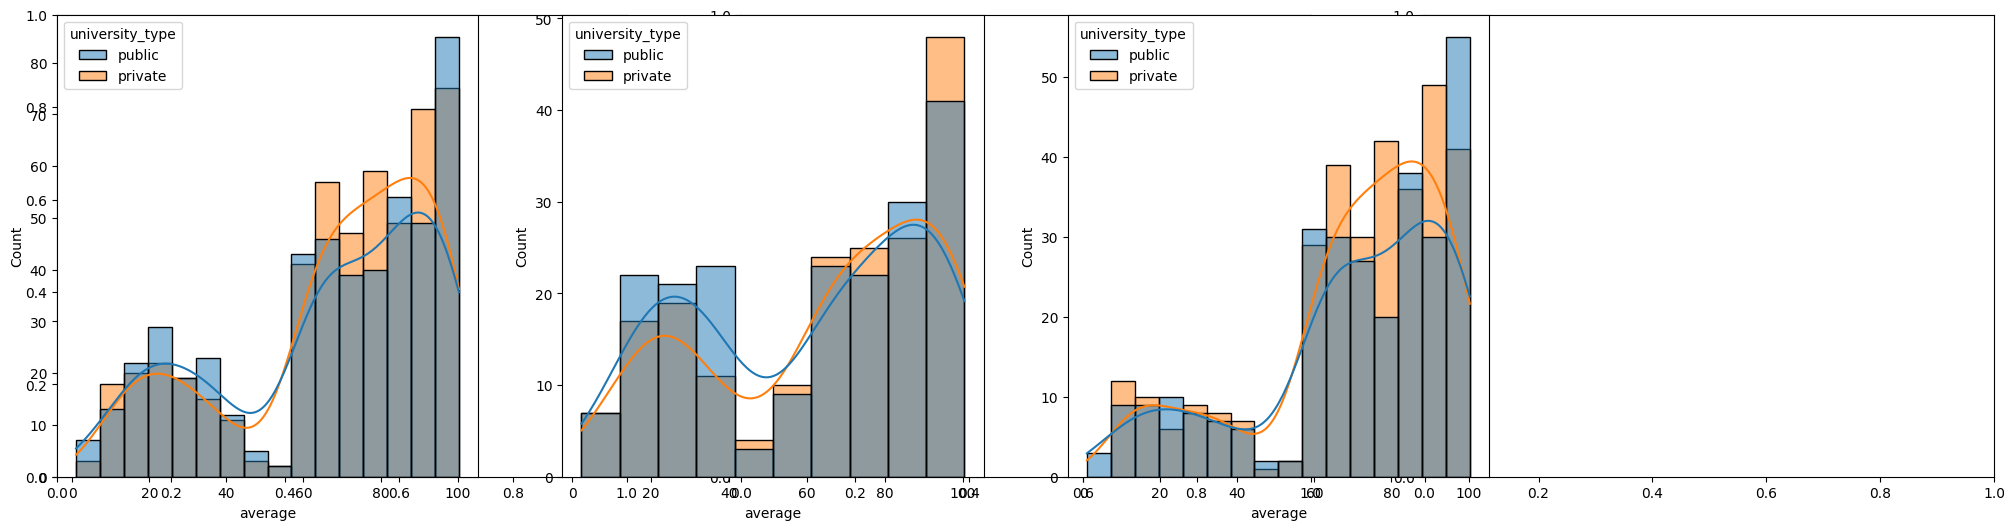

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='university_type')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='university_type')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='university_type')
plt.show()

#####  Insights
- In overall students of Public university type have performed well in their exam.

#### 4.2 Multivariate analysis using pieplot

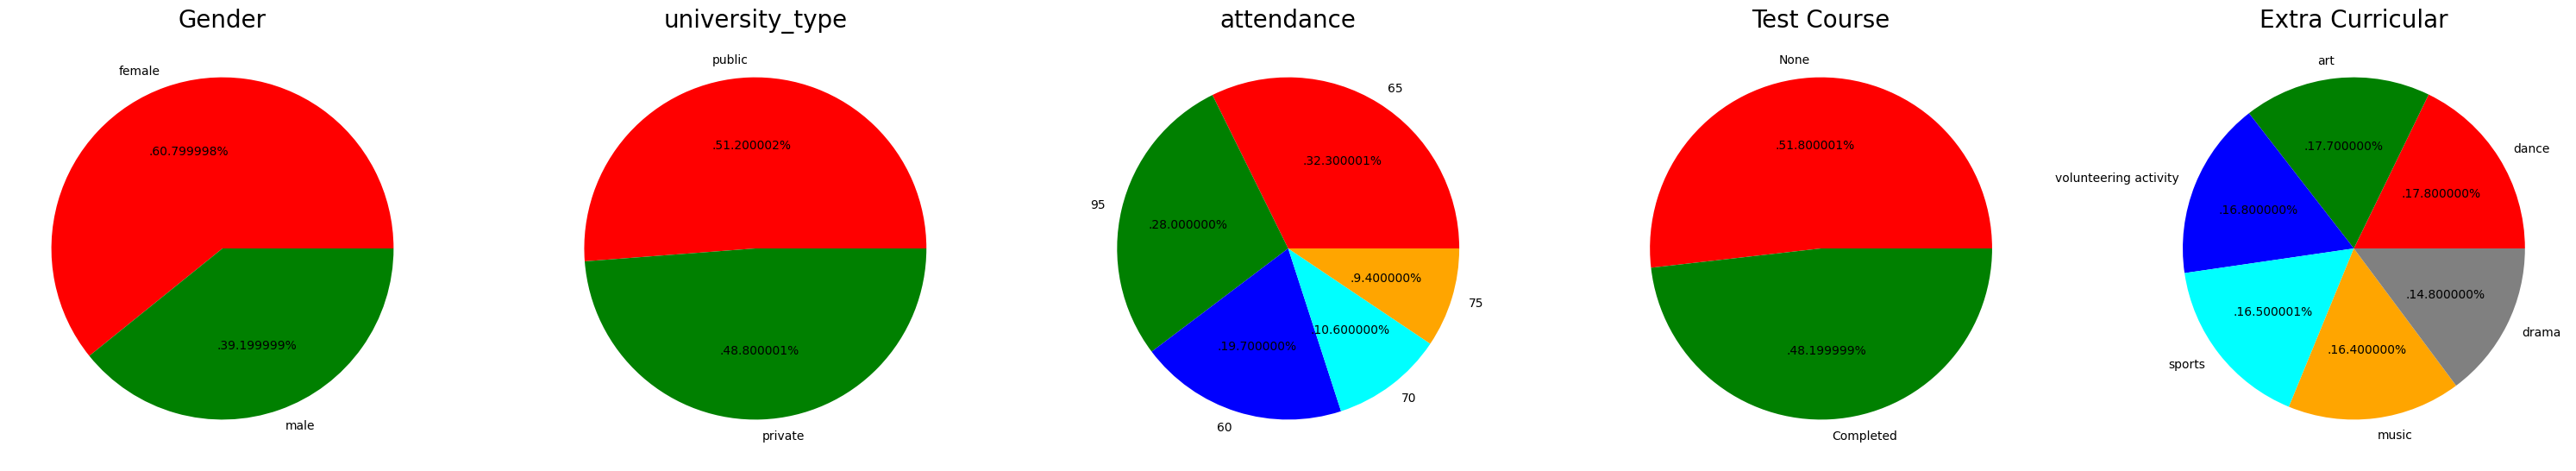

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'female', 'male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['university_type'].value_counts()
labels = 'public','private'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('university_type', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['attendance'].value_counts()
labels = '65', '95', '60', '70', '75'
color = ['red','green','blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('attendance', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['extra_curricular'].value_counts()
labels = 'dance' ,'art', 'volunteering activity', 'sports', 'music', 'drama'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Extra Curricular', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Female students is more than Male students.
- Number students are greatest in public university.
- Number of students who have 65% attendance are greater.
- Number of students who have not completed in any test preparation course is greater.
- Number of students who have opted "art" are greater followed closely by "volunteering activity".

#### 4.3 Feature Wise Visualization
#### 4.3.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

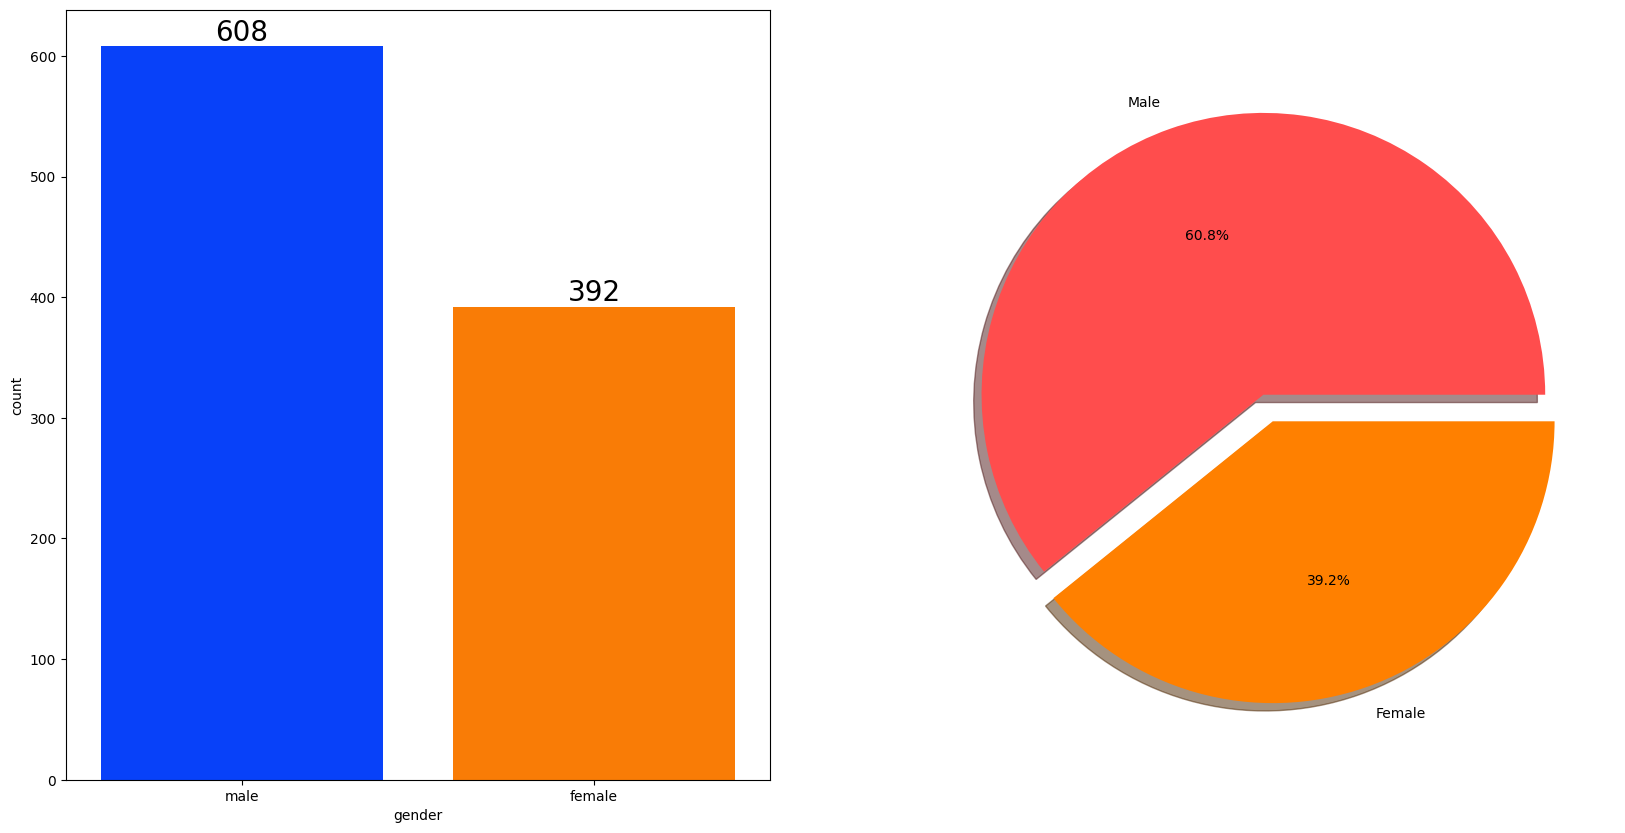

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 787 (39.3%) and male students are 1214 (60.7%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [22]:
gender_group = df.groupby('gender').agg({'final_score': 'mean','average':'mean'})
gender_group

,final_score,average
gender,,
female,63.558673,62.728741
male,71.353618,70.518092


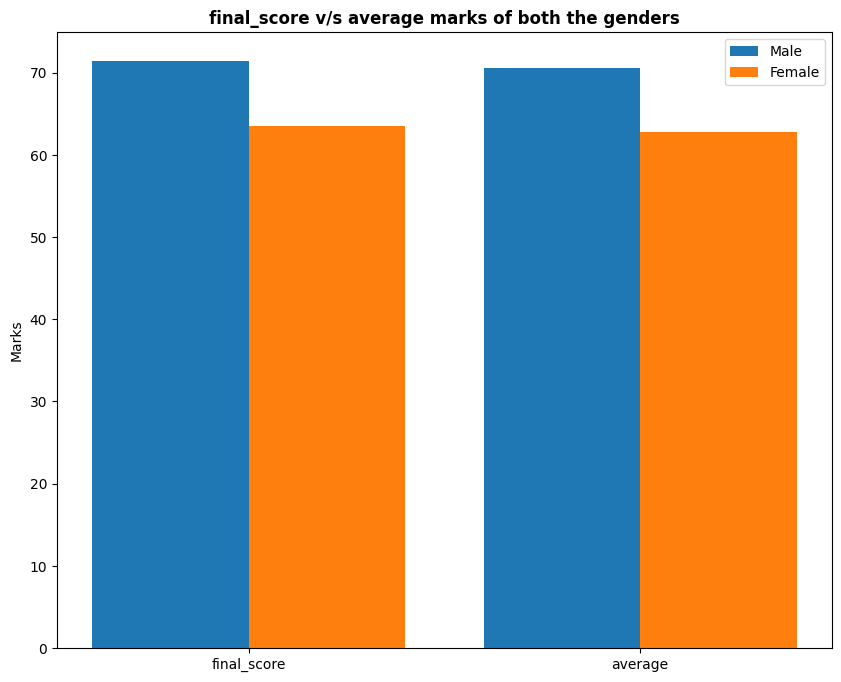

In [23]:
plt.figure(figsize=(10, 8))

X = ['final_score','average']


female_scores = [gender_group.loc['female', 'final_score'], gender_group.loc['female', 'average']]
male_scores = [gender_group.loc['male', 'final_score'], gender_group.loc['male', 'average']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("final_score v/s average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average males have a better overall score than female.

#### 4.3.2 ATTENDANCE COLUMN 
- Which attendance score is most common amoung students ?
- What is the effect of attendance on results?


#### UNIVARIATE ANALYSIS ( What is the distribution of student attendance in the dataset, and how many students fall into each attendance category? )

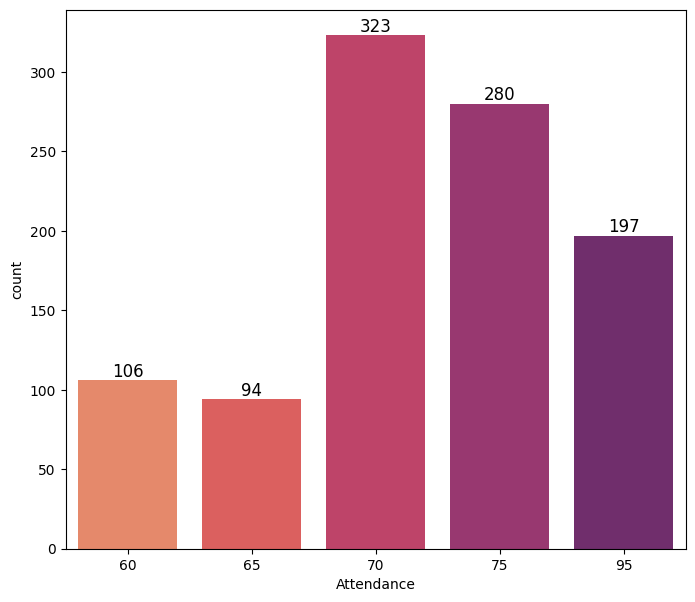

In [24]:
f,ax=plt.subplots(1,1,figsize=(8,7))
sns.countplot(x=df['attendance'], palette='flare', ax=ax, saturation=0.95,legend=False)
plt.xlabel('Attendance')
plt.ylabel('count')
for container in ax.containers:
    ax.bar_label(container,color='black',size=12)
plt.savefig('C:\\Users\\chandan\\Desktop\\22copy\\static\\analysis\\attendance.png')


#### Insights 
- The number of students who have 70% attendance is more than the number of students getting 95% attendance.

#### BIVARIATE ANALYSIS (  Does participation in a test preparation course vary based on student's involvement in extracurricular activities? )

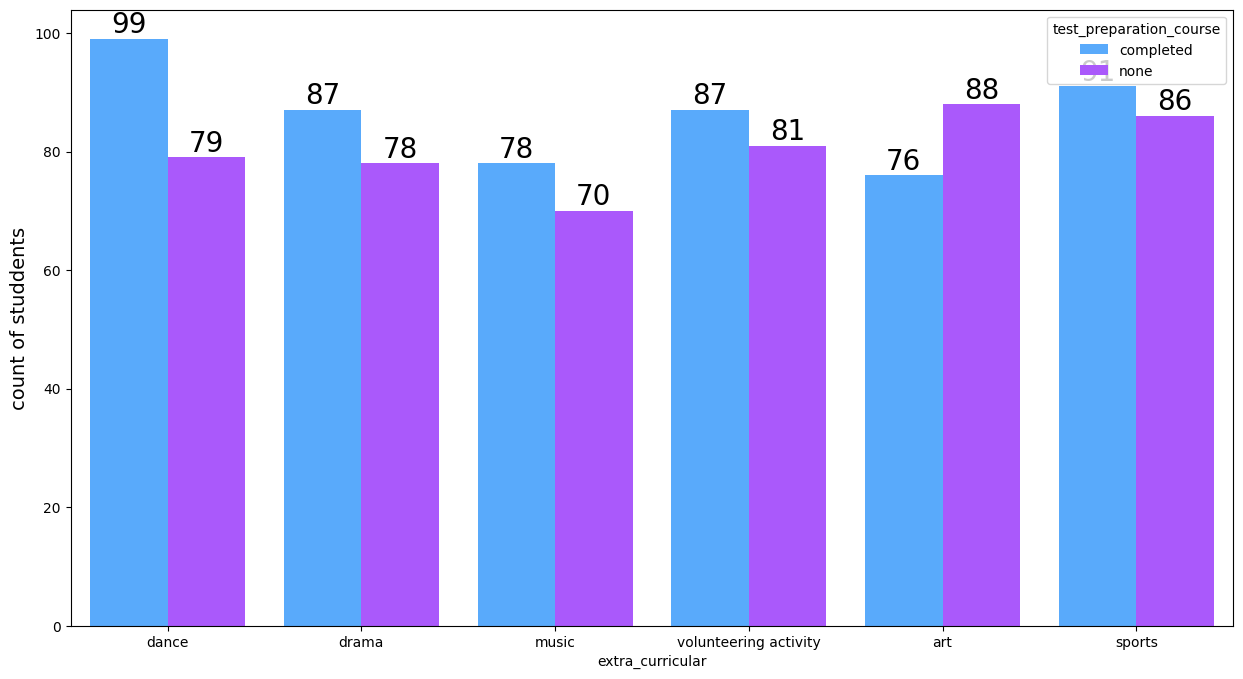

In [25]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x=df['extra_curricular'],data=df,palette = 'cool',hue='test_preparation_course',saturation=0.95,ax=ax)
plt.ylabel('count of studdents',fontsize=14)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.savefig('C:\\Users\\chandan\\Desktop\\22copy\\static\\analysis\\vs1.png')
  

#### Insights 
- The number of students who have opted for dance and completed the test_preparation coarse are more(191) compared to others.
- The number of students who have opted for volunteering activity and not-completed the test_preparation_course are more(177) compared to others.


#### BIVARIATE ANALYSIS (Does the attendance of students vary based on their involvement in extracurricular activities?)

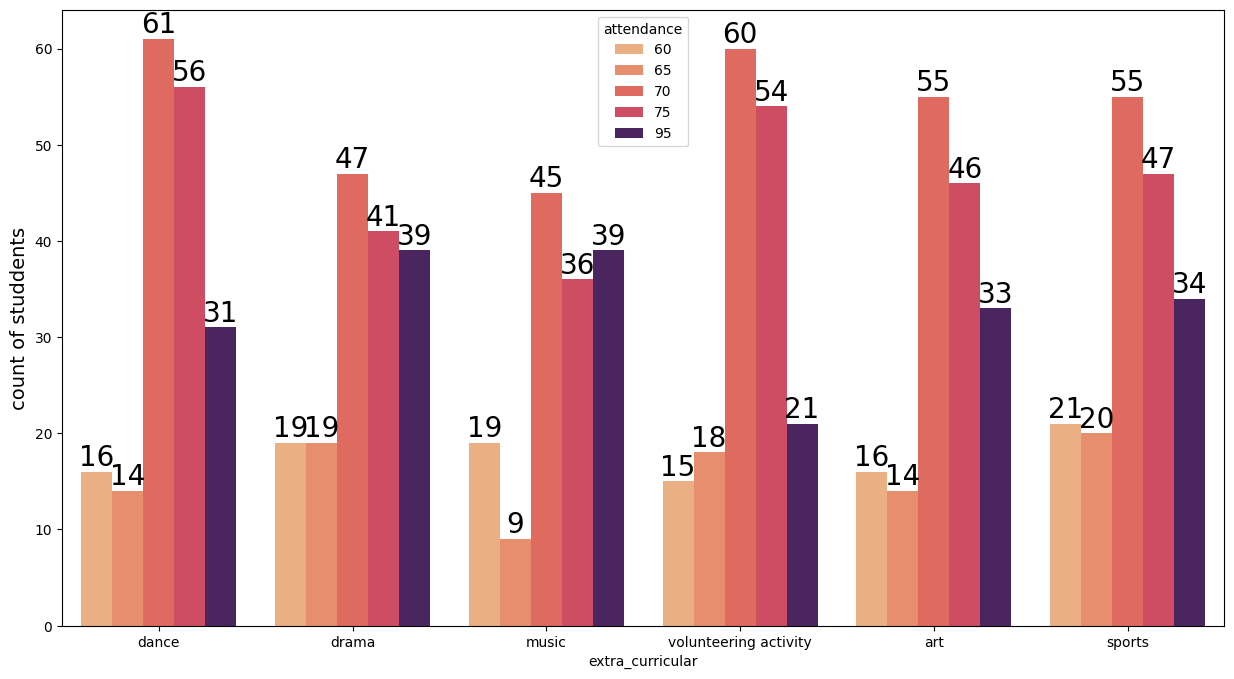

In [26]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x=df['extra_curricular'],data=df,palette = 'flare',hue='attendance',saturation=0.95,ax=ax)
plt.ylabel('count of studdents',fontsize=14)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

plt.savefig('C:\\Users\\chandan\\Desktop\\22copy\\static\\analysis\\vs2.png')
    

#### BIVARIATE ANALYSIS (Is there a relationship between students' participation in test preparation courses and their attendance, based on their involvement in extracurricular activities?)

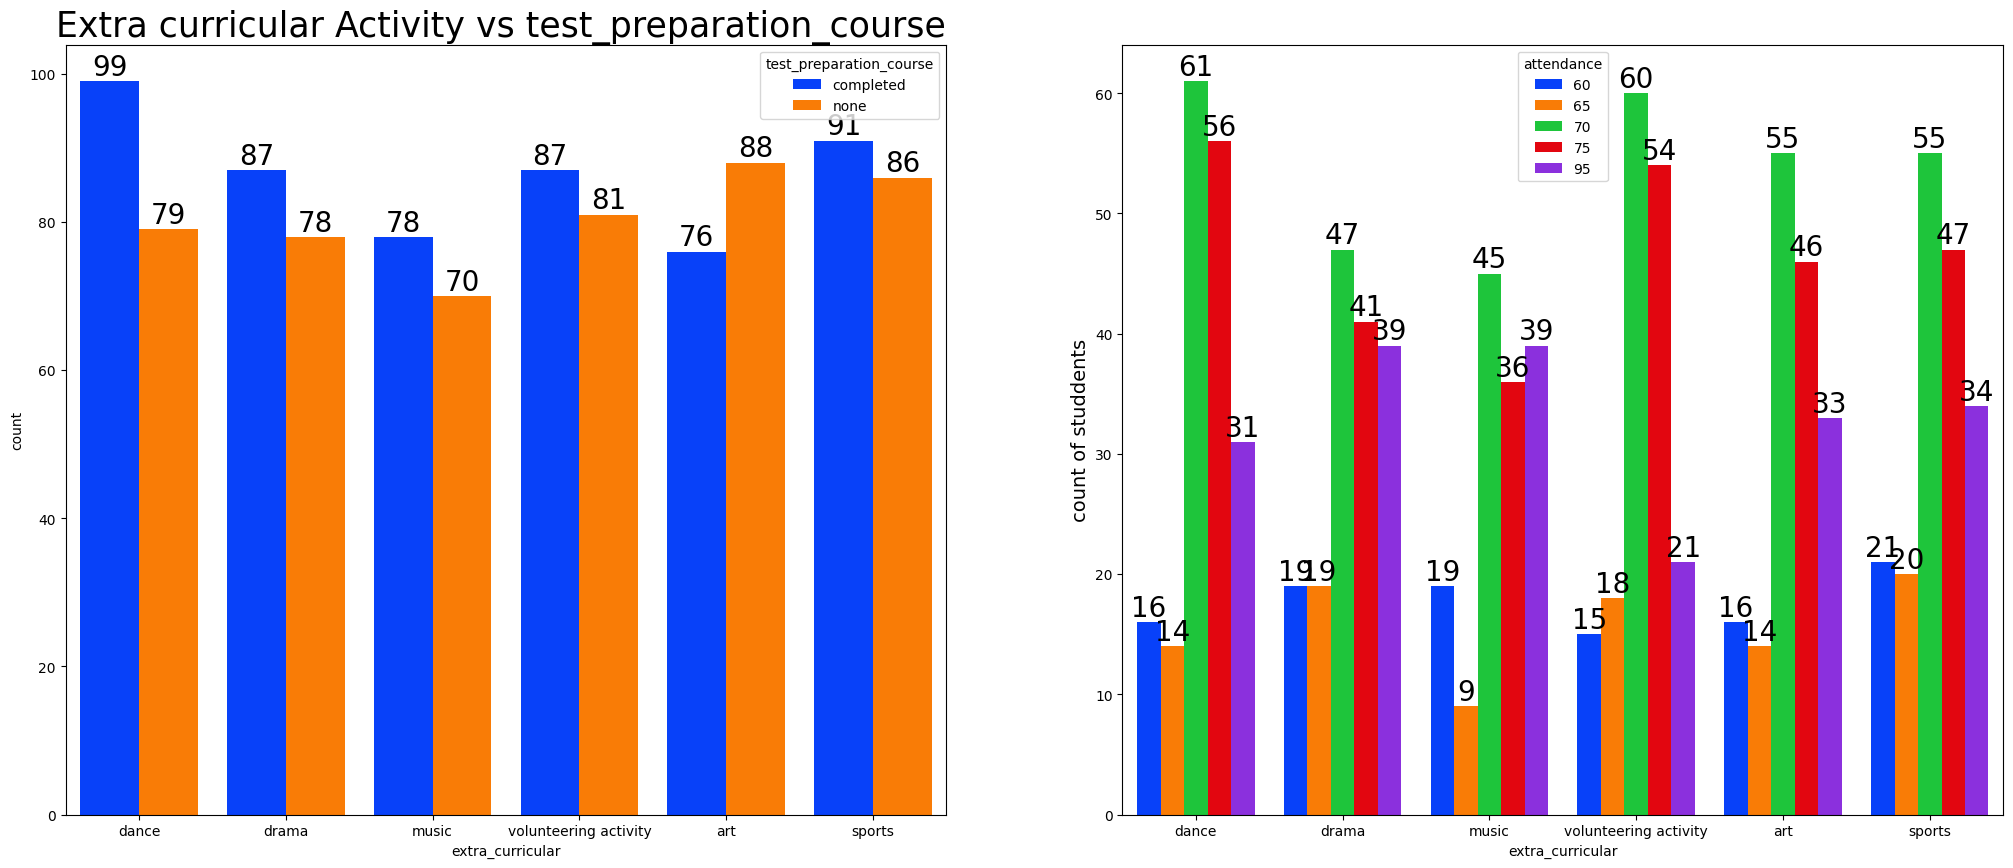

In [27]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(x=df['extra_curricular'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Extra curricular Activity vs test_preparation_course ',color='black',size=25)
plt.ylabel('count of studdents',fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['extra_curricular'],data=df,palette = 'bright',hue='attendance',saturation=0.95,ax=ax[1])
plt.ylabel('count of studdents',fontsize=14)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### 4.3.3 TEST PREPARATION COURSE COLUMN 
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( How does attendance affect the final scores, test scores, and preparation scores of students, considering their participation in a test preparation course? )

<Axes: xlabel='attendance', ylabel='prep_score'>

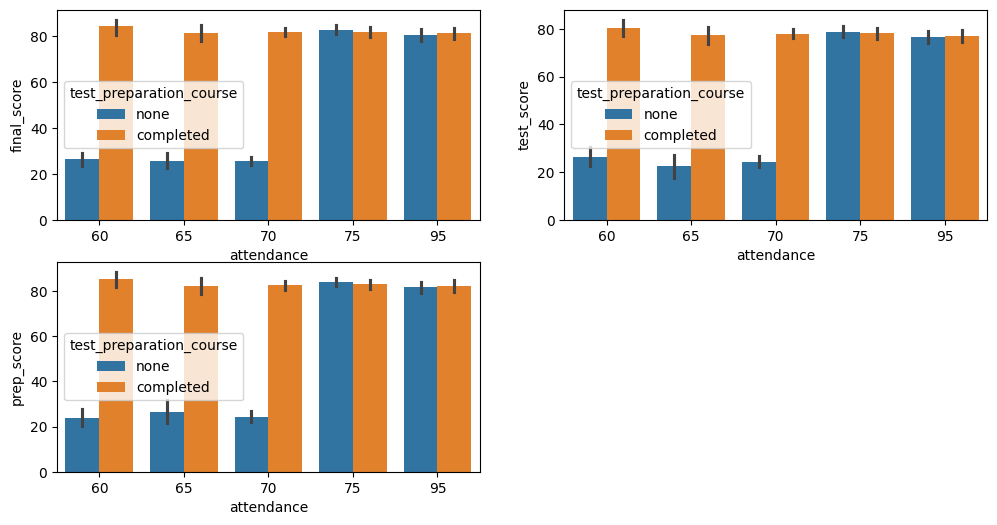

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['attendance'], y=df['final_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['attendance'], y=df['test_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['attendance'], y=df['prep_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't completed the course
- Also the students who have high attendance have scored more regardless of test_preparation_course 

### 5. Conclusions
- Student's Performance is related with Attendance, extra_curricular
- Male lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.